### Importing modules

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

### Importing necessary files

In [153]:
data_set_1 = pd.read_csv("datafile1.csv", names = ["X1","X2","Y"])
data_set_2 = pd.read_csv("datafile2.csv", names = ["X1","X2","Y"])
data_set_3 = pd.read_csv("datafile3.csv", names = ["X1","X2","Y"])
data_set_4 = pd.read_csv("datafile4.csv", names = ["X1","X2","Y"])

In [154]:
data_set_1.head(5)

,X1,X2,Y
0,0.474341,-1.164631,0
1,1.683638,-1.782302,0
2,1.589368,0.049690,1
3,-1.026358,-0.320719,0
4,0.860988,-0.168258,0


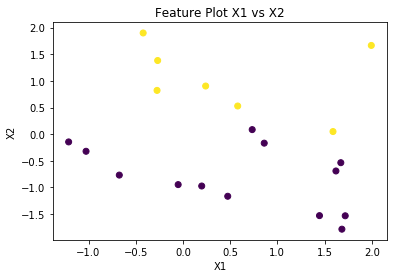

In [155]:
plt.scatter(data_set_1['X1'], data_set_1['X2'], c = data_set_1['Y'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Feature Plot X1 vs X2')
plt.show()

In [156]:
## This Plot can be linearly separable

In [158]:
#n_epoch = 20 # no of iteration
#w1 = np.random.random_sample() # weight 1 coresponding to X1
#w2 = np.random.random_sample() # weight 2 coresponding to X2
#bias = np.random.random_sample() # bias
#l_rate = 0.1 # learning rate

In [159]:
def predict(dataset):
    for i in data_set_1.iterrows():
        X_1 = i[1][0]
        X_2 = i[1][1]
        Y_actual = i[1][2]
        #print("Actual X1 is: ", X_1 ,", Actual X2 is: " ,X_2, ",Actual Y is: ", Y_actual)
        activation_value = (w1*X_1)+(w2*X_2)+bias
        if activation_value >=0:
            Y_predicted = 1
        else:
            Y_predicted = 0
    return Y_predicted

In [160]:
def train_weights(train, l_rate, n_epoch):
    w1 = np.random.random_sample() # weight 1 coresponding to X1
    w2 = np.random.random_sample() # weight 2 coresponding to X2
    bias = np.random.random_sample() # bias
    for epoch in range(n_epoch):
        sum_error = 0.0
        for i in data_set_1.iterrows():
            X_1 = i[1][0]
            X_2 = i[1][1]
            Y_actual = i[1][2]
            #print("Actual X1 is: ", X_1 ,", Actual X2 is: " ,X_2, ",Actual Y is: ", Y_actual)
            activation_value = (w1*X_1)+(w2*X_2)+bias
            if activation_value >=0:
                Y_predicted = 1
            else:
                Y_predicted = 0
            error = Y_actual - Y_predicted
            sum_error += error**2
            w1 = w1 + (error*X_1*l_rate)
            w2 = w2 + (error*X_2*l_rate)
            bias = bias + error
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

In [161]:
#dataset_1 = data_set_1_new
l_rate = 0.1
n_epoch = 20
weights = train_weights(dataset_1, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=9.000
>epoch=1, lrate=0.100, error=4.000
>epoch=2, lrate=0.100, error=2.000
>epoch=3, lrate=0.100, error=2.000
>epoch=4, lrate=0.100, error=2.000
>epoch=5, lrate=0.100, error=2.000
>epoch=6, lrate=0.100, error=2.000
>epoch=7, lrate=0.100, error=4.000
>epoch=8, lrate=0.100, error=1.000
>epoch=9, lrate=0.100, error=2.000
>epoch=10, lrate=0.100, error=2.000
>epoch=11, lrate=0.100, error=2.000
>epoch=12, lrate=0.100, error=3.000
>epoch=13, lrate=0.100, error=1.000
>epoch=14, lrate=0.100, error=2.000
>epoch=15, lrate=0.100, error=4.000
>epoch=16, lrate=0.100, error=2.000
>epoch=17, lrate=0.100, error=2.000
>epoch=18, lrate=0.100, error=2.000
>epoch=19, lrate=0.100, error=0.000
[-0.1, 0.06703210643922236, 0.3037286211215719]


In [149]:
while epoch < 20:
    total_error = 0
    for i in data_set_1.iterrows():
        X_1 = i[1][0]
        X_2 = i[1][1]
        Y_actual = i[1][2]
        #print("Actual X1 is: ", X_1 ,", Actual X2 is: " ,X_2, ",Actual Y is: ", Y_actual)
        activation_value = (w1*X_1)+(w2*X_2)+bias
        if activation_value >=0:
            Y_predicted = 1
        else:
            Y_predicted = 0
        error = Y_actual - Y_predicted
        #print(error)
        w1 = w1 + (error*X_1*l_rate)
        w2 = w2 + (error*X_2*l_rate)
        bias = bias + error
        total_error += error**2
    #print(total_error)
    if(total_error == 0):
        print("w1 = ",w1," w2 = ",w2," bias = ",bias)
        break
    epoch +=1
    

w1 =  0.689593211573  w2 =  1.71919484703  bias =  -1.15972417115


In [88]:
data_set_1_new = []
for i in data_set_1.iterrows():
    data_set_1_new.append(i[1].tolist())
#data_set_1_new

In [89]:
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights


In [90]:
# Calculate weights
dataset_1 = data_set_1_new
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset_1, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=5.000
>epoch=1, lrate=0.100, error=2.000
>epoch=2, lrate=0.100, error=2.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
[-0.1, 0.06703210643922236, 0.3037286211215719]


## Second DataSet

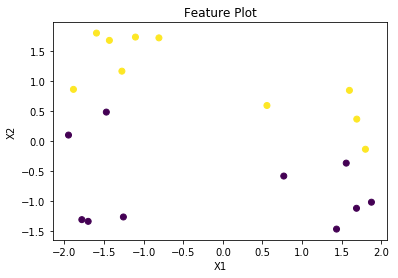

In [162]:
plt.scatter(data_set_2['X1'], data_set_2['X2'], c = data_set_2['Y'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Feature Plot')
plt.show()

In [ ]:
data_set_2_new = []
for i in data_set_2.iterrows():
    data_set_2_new.append(i[1].tolist())
#data_set_1_new

In [ ]:
dataset_2 = data_set_2_new
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset_2, l_rate, n_epoch)
print(weights)

## Third DataSet

In [ ]:
plt.scatter(data_set_3['X1'], data_set_3['X2'], c = data_set_3['Y'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Feature Plot')
plt.show()

In [ ]:
## can't be linearly separable

In [ ]:
data_set_3_new = []
for i in data_set_3.iterrows():
    data_set_3_new.append(i[1].tolist())
#data_set_1_new

In [ ]:
dataset_3 = data_set_1_new
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset_3, l_rate, n_epoch)
print(weights)

## Fourth DataSet

In [ ]:
plt.scatter(data_set_4['X1'], data_set_4['X2'], c = data_set_4['Y'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Feature Plot')
plt.show()

In [ ]:
## can't be linearly separable

In [ ]:
data_set_4_new = []
for i in data_set_4.iterrows():
    data_set_4_new.append(i[1].tolist())
#data_set_1_new

In [ ]:
dataset_4 = data_set_1_new
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset_4, l_rate, n_epoch)
print(weights)